<a href="https://colab.research.google.com/github/Kusumash28/AIML-lab/blob/main/NeuralN_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**
Neural Network for NAND gate

The truth table is dataset <br>
A	B	Y <br>
0	0	1 <br>
0	1	1 <br>
1	0	1 <br>
1	1	0 <br>



In [2]:
import numpy as np

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem

In [4]:
#Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
#Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
epoch = 100000
learning_rate = 0.01
input_layer_neurons = 2  # number of features
hidden_layer_neurons = 3  # number of hidden neurons
output_neurons = 1  # number of output neurons

In [7]:
#initializing weights and biases
np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))

In [8]:
#Backpropagation algorithm
for epoch in range(epoch):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_output = sigmoid(final_input)

    # Backward propagation
    error = Y - final_output
    d_final_output = error * sigmoid_derivative(final_output)

    error_hidden_layer = d_final_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate


In [9]:
#print final output
print("Final output after training:")
print(final_output)

# Compute the mean squared error
mse = np.mean(np.square(Y - final_output))
print("Mean Squared Error:",mse)


Final output after training:
[[0.12522766]
 [0.91304128]
 [0.91330697]
 [0.05990305]]
Mean Squared Error: 0.008586961395915294


In [10]:
#Test the model with new data
test_data = [0, 1]
hidden_layer_input = np.dot(test_data, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
final_input = np.dot(hidden_layer_output, weights_hidden_output)
final_output = sigmoid(final_input)
print("Test data:", test_data)
print("Predicted output:", final_output)
print("Actual output:", Y[1])  # Expected output for XOR(0, 1) is 1

Test data: [0, 1]
Predicted output: [0.91304216]
Actual output: [1]


In [11]:
# Display the weights and biases rounding to 2 decimal places

print("Weights from input to hidden layer:")
print(np.round(weights_input_hidden, 2))  # Use np.round for NumPy arrays

print("Weights from hidden to output layer:")
print(np.round(weights_hidden_output, 2))  # Use np.round for NumPy arrays


Weights from input to hidden layer:
[[-2.56  5.07  4.92]
 [ 4.91 -2.64  4.94]]
Weights from hidden to output layer:
[[-6.75]
 [-6.7 ]
 [ 9.57]]


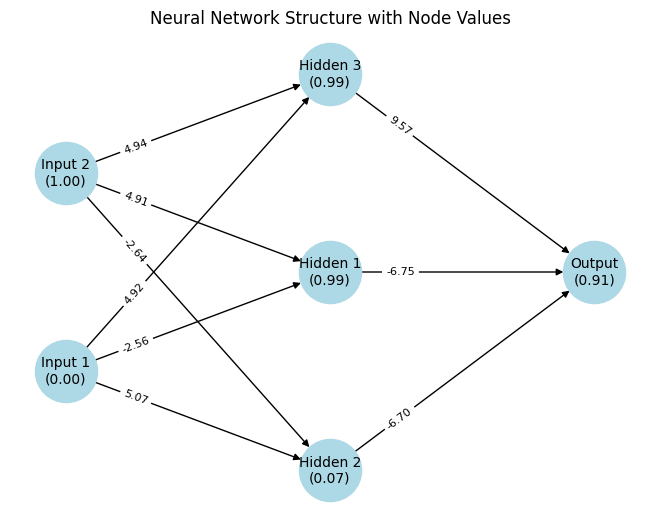

In [12]:
#Plot the netwrork grpahically
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()

    # Input layer
    for i in range(input_layer_neurons):
        G.add_node(f'Input {i+1}', layer=0, value=input_values[i])  # Assign layer 0 for input nodes

    # Hidden layer
    for i in range(hidden_layer_neurons):
        G.add_node(f'Hidden {i+1}', layer=1, value=hidden_values[i])  # Assign layer 1 for hidden nodes

    # Output layer
    G.add_node('Output', layer=2, value=output_value)  # Assign layer 2 for output node

    # Add edges from input to hidden layer
    for i in range(input_layer_neurons):
        for j in range(hidden_layer_neurons):
            G.add_edge(f'Input {i+1}', f'Hidden {j+1}', weight=round(weights_input_hidden[i][j], 2))

    # Add edges from hidden to output layer
    for i in range(hidden_layer_neurons):
        G.add_edge(f'Hidden {i+1}', 'Output', weight=round(weights_hidden_output[i][0], 2))

    # Use multipartite layout with explicit layer ordering
    pos = nx.multipartite_layout(G, subset_key="layer")

    # Draw the graph
    node_labels = {
        node: f"{node}\n({data['value']:.2f})" if np.isscalar(data['value']) else f"{node}\n({data['value'].item():.2f})"
        for node, data in G.nodes(data=True)
    }  # Add node values
    edge_labels = {
        (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
    }  # Round edge weights to 2 decimal places

    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.25
    )  # Adjust label_pos to avoid overlap
    plt.title("Neural Network Structure with Node Values")
    plt.show()

# Example usage
input_values = [0, 1]  # Example input values
hidden_layer_input = np.dot(input_values, weights_input_hidden)
hidden_values = sigmoid(hidden_layer_input)  # Hidden layer activations
final_input = np.dot(hidden_values, weights_hidden_output)
output_value = sigmoid(final_input)  # Output value

plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value)

## Activity to do

Implement tanh and Relu Activation fucntion and compare the performance of the three actioviation function viz signmoid, tanh and Relu


Training with Sigmoid activation...
🔹 Sigmoid Accuracy: 0.9500

Training with Tanh activation...
🔹 Tanh Accuracy: 0.9900

Training with ReLU activation...
🔹 ReLU Accuracy: 0.9900


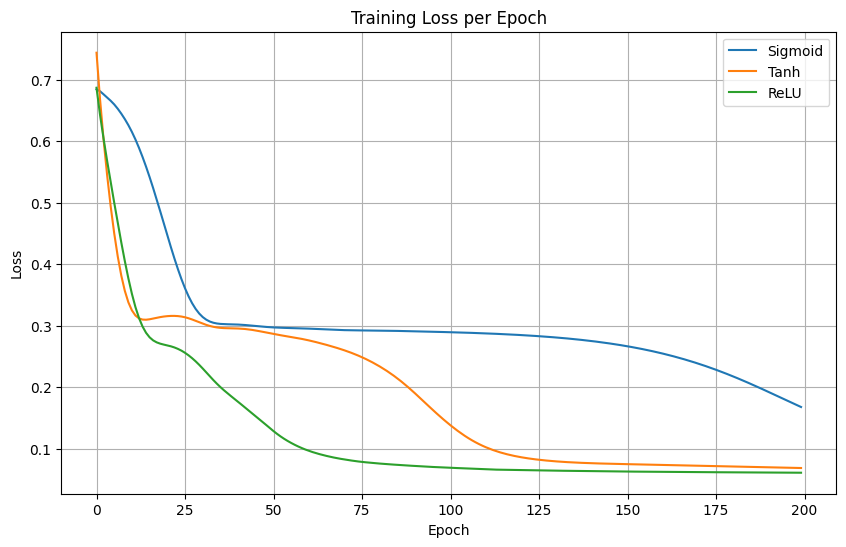

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic binary classification dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Neural network model class
class NeuralNet(nn.Module):
    def __init__(self, activation):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(2, 16)
        self.layer2 = nn.Linear(16, 16)
        self.output = nn.Linear(16, 2)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        return self.output(x)

# Train function
def train_model(activation_fn, name):
    model = NeuralNet(activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    losses = []
    for epoch in range(200):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Evaluation
    with torch.no_grad():
        pred = model(X_test_tensor).argmax(dim=1)
        acc = accuracy_score(y_test, pred)
    print(f"🔹 {name} Accuracy: {acc:.4f}")
    return losses, acc

# Activation functions to compare
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU()
}

# Training and comparison
results = {}
for name, act_fn in activations.items():
    print(f"\nTraining with {name} activation...")
    loss, acc = train_model(act_fn, name)
    results[name] = (loss, acc)

# Plot training loss
plt.figure(figsize=(10, 6))
for name, (losses, _) in results.items():
    plt.plot(losses, label=name)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
